In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [4]:
data = pd.read_csv('/kaggle/input/suv-data/suv_data.csv')

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
df = pd.DataFrame(data.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


""


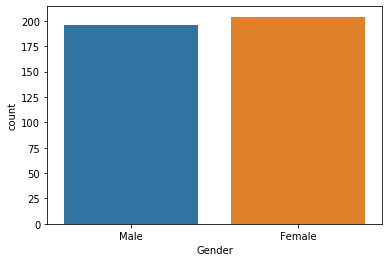

In [8]:
sns.countplot(x='Gender',data=data)

 #  As we can see from above countplot this data contains more number of Female than male

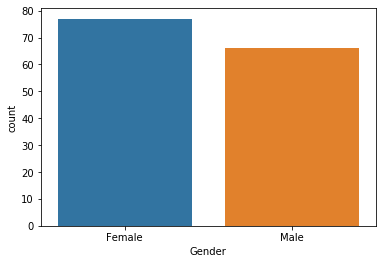

In [9]:
sns.countplot(x='Gender',data=data[data['Purchased']==1])

female customer purchased car more than male 

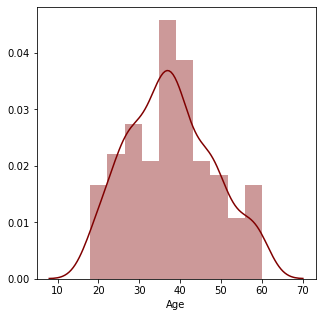

In [10]:
plt.figure(figsize = (5,5))
sns.distplot(data['Age'],color='maroon')

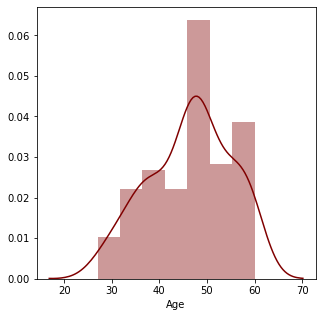

In [11]:
plt.figure(figsize = (5,5))
sns.distplot(data[data['Purchased']==1]['Age'],color='maroon')

number customers who purchased cars are in between age range of 45-55 

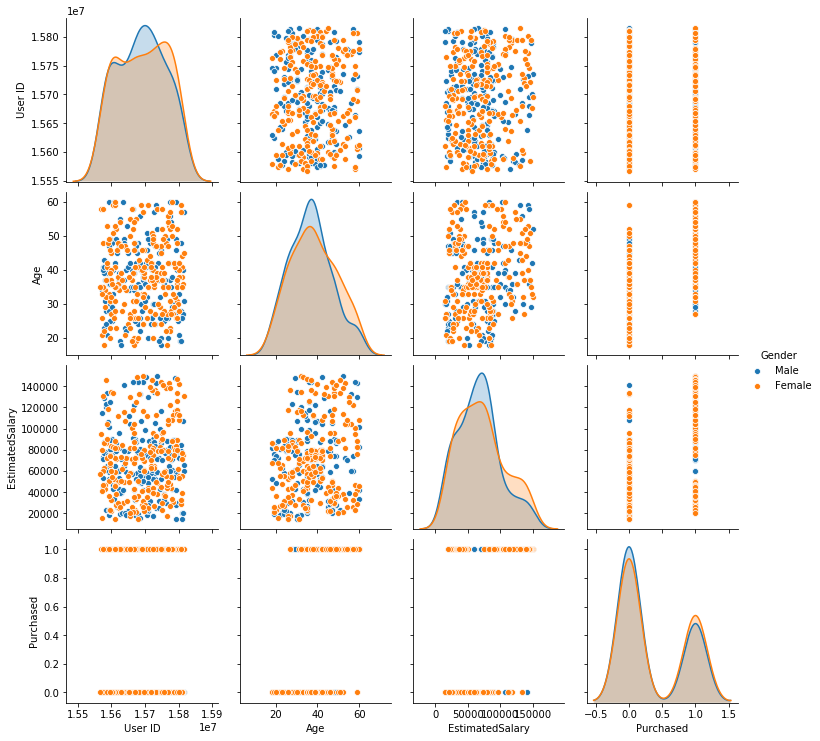

In [12]:
sns.pairplot(data=data,hue='Gender')

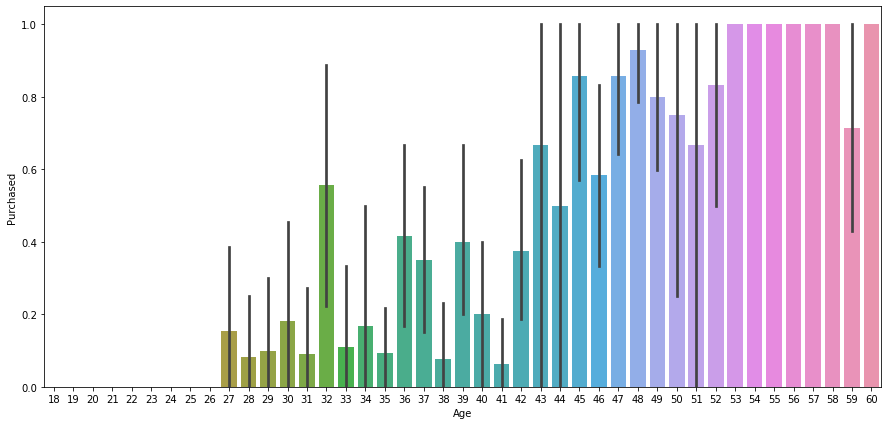

In [13]:
plt.figure(figsize = (15,7))
sns.barplot(x=data['Age'],y=data['Purchased'])

**customers having age 18-26 have not purchased car**

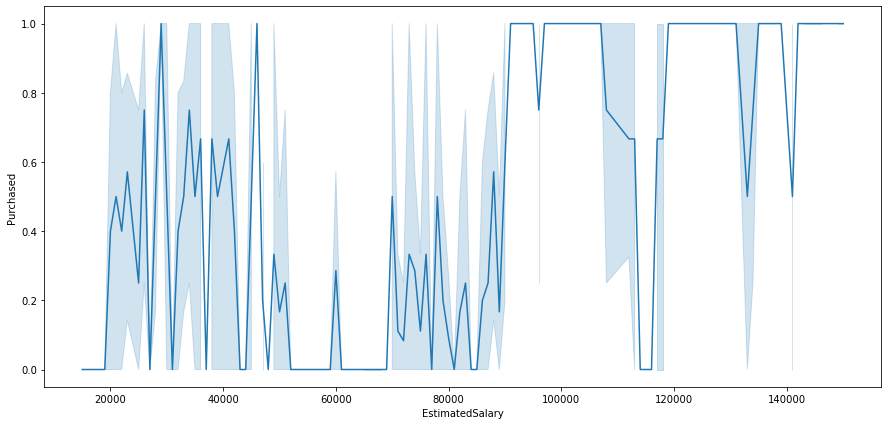

In [14]:
plt.figure(figsize = (15,7))
sns.lineplot(x=data['EstimatedSalary'],y=data['Purchased'])

In [15]:
data['EstimatedSalary'].max()

150000

In [16]:
data['EstimatedSalary'].min()

15000

In [17]:
data[data['Purchased'] ==1 ]['EstimatedSalary'].max()

150000

In [18]:
data[data['Purchased'] ==1 ]['EstimatedSalary'].min()

20000

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Gender"] = le.fit_transform(data['Gender'])

In [20]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


# Creating Model 

In [21]:
x = data.drop(['Purchased'],axis=1).values
y = data['Purchased'].values

In [22]:
x_train ,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
pred = lr.predict(x_test)

In [25]:
pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [26]:
from sklearn.metrics import confusion_matrix

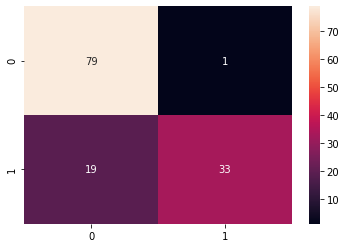

In [27]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8484848484848485